# The Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.linspace(0,50,501)

In [3]:
y = np.sin(x)

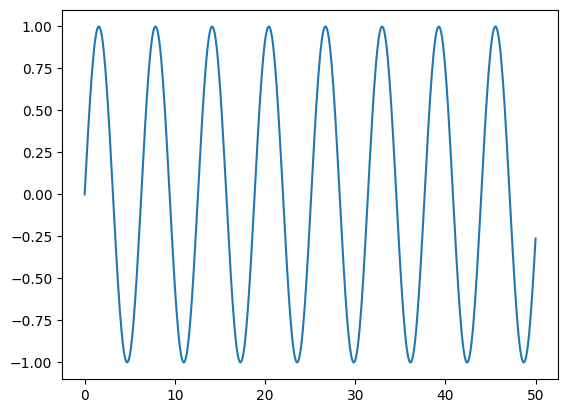

In [4]:
plt.plot(x,y)

In [5]:
df = pd.DataFrame(data=y,index=x,columns=['Sine'])

In [6]:
df.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [7]:
test_percent = 0.1 # 10%

In [8]:
len(df)*test_percent

50.1

In [9]:
test_point = np.round(len(df)*test_percent)

In [10]:
test_point

50.0

In [11]:
test_ind = int(len(df)-test_point)

In [12]:
test_ind

451

In [13]:
train = df.iloc[:test_ind]

In [14]:
test = df.iloc[test_ind:]

In [15]:
train.head()

,Sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418


In [16]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [17]:
train.shape

(451, 1)

In [18]:
test.shape

(50, 1)

In [19]:
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler = MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [24]:
scaled_train = scaler.transform(train)

In [25]:
scaled_test = scaler.transform(test)

In [28]:
#scaled_test

In [29]:
#test

# Batch Generator

In [30]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [31]:
length = 2
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size)

In [32]:
len(generator)

449

In [33]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [38]:
#scaled_train

# Creating the model

In [39]:
length = 50
batch_size = 1

generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size)

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
from tensorflow.keras.layers import Dense,SimpleRNN,LSTM

In [42]:
n_features = 1

In [44]:
model = Sequential()

model.add(SimpleRNN(50,input_shape=(length,n_features)))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

2023-06-03 10:21:25.332662: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2
2023-06-03 10:21:25.366931: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400000000 Hz
2023-06-03 10:21:25.367103: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x4bd3c90 executing computations on platform Host. Devices:
2023-06-03 10:21:25.367116: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): Host, Default Version


In [45]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 50)                2600      
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 21s 53ms/step - loss: 0.0018
Epoch 2/5
401/401 [==============================] - 25s 62ms/step - loss: 6.8336e-04
Epoch 3/5
401/401 [==============================] - 25s 61ms/step - loss: 8.4960e-06
Epoch 4/5
401/401 [==============================] - 24s 60ms/step - loss: 2.9139e-05
Epoch 5/5
401/401 [==============================] - 24s 60ms/step - loss: 1.6423e-04


In [47]:
losses = pd.DataFrame(model.history.history)

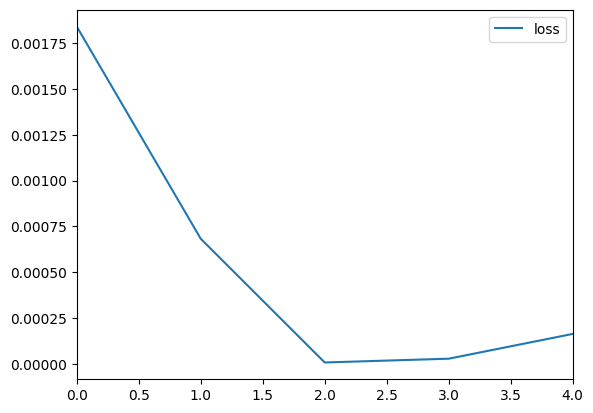

In [48]:
losses.plot()

In [49]:
first_eval_batch  = scaled_train[-length:]

In [51]:
first_eval_batch = first_eval_batch.reshape(1,length,n_features)

In [52]:
model.predict(first_eval_batch)

array([[0.94895375]], dtype=float32)

In [53]:
scaled_test[0]

array([0.94955134])

In [54]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

In [56]:
first_eval_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [55]:
predicted_value = [[[99]]]
np.append(current_batch[:,1:,:],predicted_value,axis = 1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [57]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [58]:
test_predictions

[array([0.94895375], dtype=float32),
 array([0.9677469], dtype=float32),
 array([0.9813167], dtype=float32),
 array([0.9897611], dtype=float32),
 array([0.99285054], dtype=float32),
 array([0.99069816], dtype=float32),
 array([0.9833932], dtype=float32),
 array([0.9710479], dtype=float32),
 array([0.9539131], dtype=float32),
 array([0.9321828], dtype=float32),
 array([0.90627104], dtype=float32),
 array([0.87629294], dtype=float32),
 array([0.8427918], dtype=float32),
 array([0.80588675], dtype=float32),
 array([0.7661267], dtype=float32),
 array([0.72370124], dtype=float32),
 array([0.67906535], dtype=float32),
 array([0.6324502], dtype=float32),
 array([0.58428633], dtype=float32),
 array([0.5348618], dtype=float32),
 array([0.48466554], dtype=float32),
 array([0.43406424], dtype=float32),
 array([0.3835903], dtype=float32),
 array([0.33374646], dtype=float32),
 array([0.2850384], dtype=float32),
 array([0.23813231], dtype=float32),
 array([0.19350185], dtype=float32),
 array([0.1518

In [59]:
scaled_test

array([[9.49551344e-01],
       [9.69156618e-01],
       [9.84074225e-01],
       [9.94155114e-01],
       [9.99298559e-01],
       [9.99453170e-01],
       [9.94617400e-01],
       [9.84839568e-01],
       [9.70217371e-01],
       [9.50896908e-01],
       [9.27071224e-01],
       [8.98978376e-01],
       [8.66899060e-01],
       [8.31153800e-01],
       [7.92099752e-01],
       [7.50127132e-01],
       [7.05655314e-01],
       [6.59128649e-01],
       [6.11012013e-01],
       [5.61786173e-01],
       [5.11942978e-01],
       [4.61980443e-01],
       [4.12397778e-01],
       [3.63690397e-01],
       [3.16344967e-01],
       [2.70834550e-01],
       [2.27613868e-01],
       [1.87114770e-01],
       [1.49741909e-01],
       [1.15868702e-01],
       [8.58335998e-02],
       [5.99367021e-02],
       [3.84367625e-02],
       [2.15486014e-02],
       [9.44095974e-03],
       [2.23481297e-03],
       [2.16257798e-06],
       [2.76531647e-03],
       [1.04966661e-02],
       [2.31189624e-02],


In [60]:
true_predictions = scaler.inverse_transform(test_predictions)

In [61]:
true_predictions

array([[ 0.89790206],
       [ 0.93548809],
       [ 0.96262741],
       [ 0.97951614],
       [ 0.98569494],
       [ 0.98139021],
       [ 0.96678039],
       [ 0.94208996],
       [ 0.90782067],
       [ 0.86436041],
       [ 0.81253733],
       [ 0.75258162],
       [ 0.68557986],
       [ 0.61177035],
       [ 0.53225088],
       [ 0.44740065],
       [ 0.35812959],
       [ 0.26490009],
       [ 0.16857308],
       [ 0.06972481],
       [-0.0306669 ],
       [-0.1318687 ],
       [-0.23281574],
       [-0.33250264],
       [-0.42991796],
       [-0.5237294 ],
       [-0.61298962],
       [-0.69620118],
       [-0.77258617],
       [-0.8407376 ],
       [-0.90021541],
       [-0.94983248],
       [-0.98947742],
       [-1.01835903],
       [-1.03666164],
       [-1.04411306],
       [-1.04099437],
       [-1.02752102],
       [-1.00393586],
       [-0.97079863],
       [-0.92837408],
       [-0.8774817 ],
       [-0.81830267],
       [-0.75185002],
       [-0.67822725],
       [-0

In [62]:
test.head()

,Sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591


In [63]:
test['Predictions'] = true_predictions

/home/vboxuser/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [64]:
test.head()

,Sine,Predictions
45.1,0.899097,0.897902
45.2,0.938307,0.935488
45.3,0.968142,0.962627
45.4,0.988304,0.979516
45.5,0.998591,0.985695


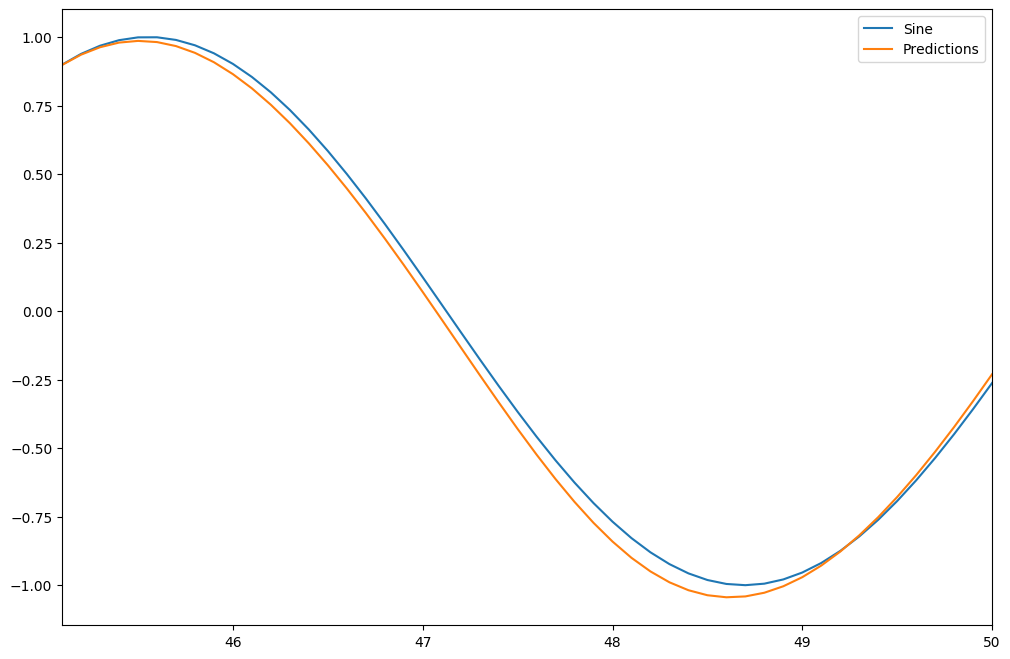

In [65]:
test.plot(figsize=(12,8))

# LSTMs and Forecasting 

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [68]:
# validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)
# error length must be one shorter

In [69]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size = 1)

validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [70]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [73]:
model.fit_generator(generator,epochs=20,validation_data=validation_generator,callbacks =[early_stop])

Epoch 1/20
402/402 [==============================] - 38s 94ms/step - loss: 0.0188 - val_loss: 1.2612e-05
Epoch 2/20
402/402 [==============================] - 37s 91ms/step - loss: 1.7741e-04 - val_loss: 2.9225e-05
Epoch 3/20
402/402 [==============================] - 36s 89ms/step - loss: 3.3426e-04 - val_loss: 1.5494e-04


In [74]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

2023-06-03 10:44:02.373524: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_cudnn_lstm_with_fallback_5188631' and '__inference_standard_lstm_5188520_specialized_for_sequential_2_lstm_StatefulPartitionedCall_at___inference_distributed_function_5188822' both implement 'lstm_36d1c842-0e90-4c5b-bbfa-f0654a185b2f' but their signatures do not match.


/home/vboxuser/anaconda3/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


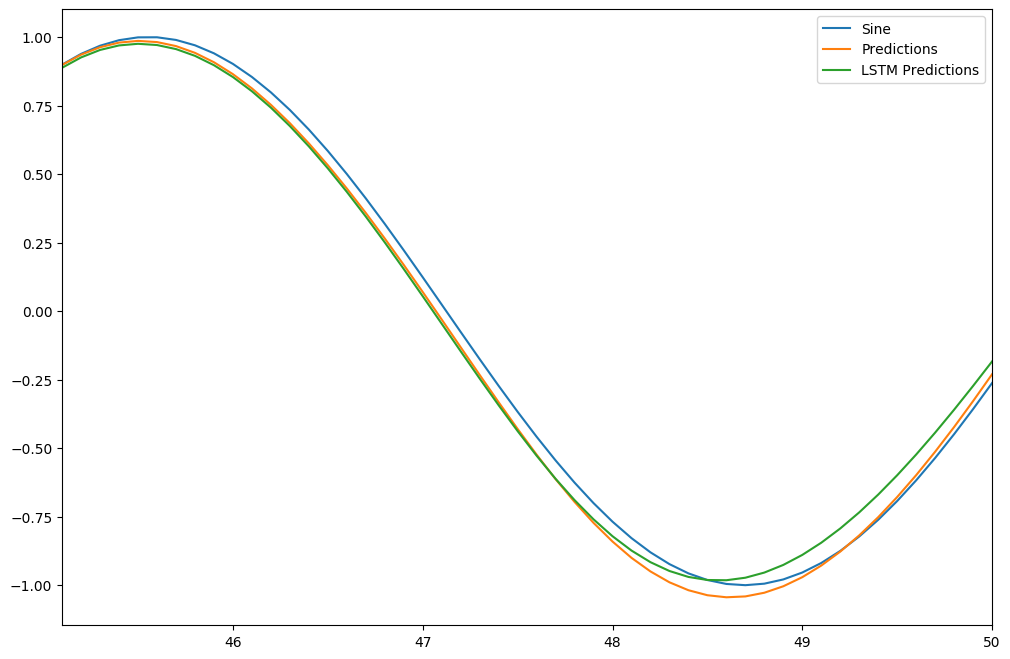

In [75]:
true_predictions = scaler.inverse_transform(test_predictions)
test['LSTM Predictions'] = true_predictions
test.plot(figsize=(12,8))

In [76]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [77]:
generator = TimeseriesGenerator(scaled_full_data,scaled_full_data,length = length,batch_size = batch_size)

In [78]:
model = Sequential()

model.add(LSTM(50,input_shape=(length,n_features)))

model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')

In [79]:
model.fit_generator(generator,epochs = 6)

Epoch 1/6
452/452 [==============================] - 40s 89ms/step - loss: 0.0095
Epoch 2/6
452/452 [==============================] - 41s 90ms/step - loss: 8.2500e-05
Epoch 3/6
452/452 [==============================] - 41s 91ms/step - loss: 2.3285e-04
Epoch 4/6
452/452 [==============================] - 38s 84ms/step - loss: 5.0660e-04
Epoch 5/6
452/452 [==============================] - 40s 89ms/step - loss: 1.0259e-04
Epoch 6/6
452/452 [==============================] - 40s 89ms/step - loss: 3.7201e-05


In [80]:
forecast = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1,length,n_features))

for i in range(25):
    current_pred = model.predict(current_batch)[0]
    
    forecast.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

2023-06-03 10:54:16.966302: W tensorflow/core/grappler/optimizers/implementation_selector.cc:310] Skipping optimization due to error while loading function libraries: Invalid argument: Functions '__inference_standard_lstm_11899181_specialized_for_sequential_3_lstm_1_StatefulPartitionedCall_at___inference_distributed_function_11899483' and '__inference_cudnn_lstm_with_fallback_11899292' both implement 'lstm_b17306fa-65c9-4b66-9b67-3db3f51f78cb' but their signatures do not match.


In [81]:
forecast = scaler.inverse_transform(forecast)

In [82]:
25*0.1

2.5

In [83]:
forecast_index = np.arange(50.1,52.6,step=0.1)

In [84]:
len(forecast)

25

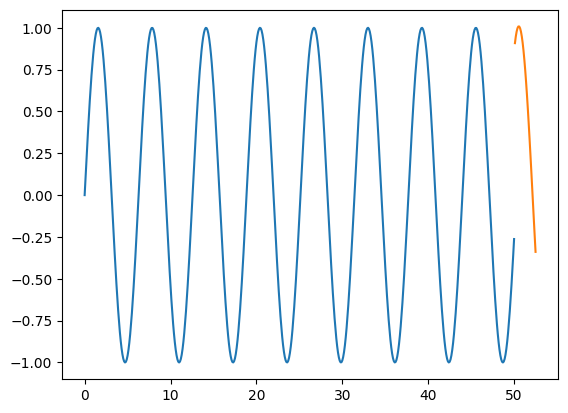

In [85]:
plt.plot(df.index,df['Sine'])
plt.plot(forecast_index,forecast)